<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment13/B/YolloFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


In [5]:
cd YoloV3/

/content/YoloV3


In [0]:
!mkdir Video

In [0]:
%cp "/content/gdrive/My Drive/EvaFiles/panda_EDIT.mp4" Video/

In [8]:
%cd Video
!ffmpeg -i panda.mp4 image-%03d.jpg 
!rm panda.mp4
%cd ../
!ls 


/content/YoloV3/Video
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 

In [9]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     Video
 models.py	   results.png	  train_batch0.png   vim.exe.stackdump


In [0]:
mkdir weights

In [11]:
!rm -rf data/customdata/
%cd /content/YoloV3/data/
!git clone https://github.com/roshantac/customdata.git
!ls

/content/YoloV3/data
Cloning into 'customdata'...
remote: Enumerating objects: 937, done.
remote: Counting objects: 100% (937/937), done.
remote: Compressing objects: 100% (899/899), done.
remote: Total 937 (delta 10), reused 917 (delta 1), pack-reused 0
Receiving objects: 100% (937/937), 4.27 MiB | 9.50 MiB/s, done.
Resolving deltas: 100% (10/10), done.
coco.names  customdata	samples  smalcoco


In [12]:
%cd ../

/content/YoloV3


In [13]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 03:39:01.278494: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2566      0 --:--:-- --:--:-- --:--:--  2566
  0     0    0     0    0     0     

In [14]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 250 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=5, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 03:39:46.769324: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (456 found, 0 missing, 0 empty, 0 duplicate, for 456 images): 100% 456/456 [00:00<00:00, 9840.72it/s]
Caching images (0.3GB): 100% 456/456 [00:00<00:00, 749.90it/s]
Reading image shapes: 100% 456/456 [00:00<00:00, 12485.98it/s]
Caching labels (456 found,

In [15]:
!python detect.py --conf-thres 0.15 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/456 data/customdata/images/image-001.jpg: 512x512 Done. (0.020s)
image 2/456 data/customdata/images/image-002.jpg: 512x512 Done. (0.020s)
image 3/456 data/customdata/images/image-003.jpg: 512x512 Done. (0.020s)
image 4/456 data/customdata/images/image-004.jpg: 512x512 Done. (0.020s)
image 5/456 data/customdata/images/image-005.jpg: 512x512 Done. (0.020s)
image 6/456 data/customdata/images/image-006.jpg: 512x512 Done. (0.020s)
image 7/456 data/customdata/images/image-007.jpg: 512x512 Done. (0.020s)
imag

In [0]:
!mkdir VideoOut

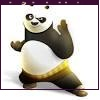

In [17]:
Image(filename='out_out/image-011.jpg', width=600)

In [18]:
!python detect.py --conf-thres 0.15 --source '/content/YoloV3/Video' --output '/content/YoloV3/VideoOut'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.15, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/YoloV3/VideoOut', save_txt=False, source='/content/YoloV3/Video', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/806 /content/YoloV3/Video/image-001.jpg: 320x512 1 KungfuPandas, Done. (0.017s)
image 2/806 /content/YoloV3/Video/image-002.jpg: 320x512 1 KungfuPandas, Done. (0.016s)
image 3/806 /content/YoloV3/Video/image-003.jpg: 320x512 1 KungfuPandas, Done. (0.016s)
image 4/806 /content/YoloV3/Video/image-004.jpg: 320x512 1 KungfuPandas, Done. (0.015s)
image 5/806 /content/YoloV3/Video/image-005.jpg: 320x512 1 KungfuPandas, Done. (0.015s)
image 6/806 /content/YoloV3/Video/image-006.jpg: 320x512 1

In [19]:
%cd VideoOut/
!ffmpeg -i image-%03d.jpg FinalVideo2.mp4
!cp FinalVideo.mp4 "/content/gdrive/My Drive/EvaFiles/"

/content/YoloV3/VideoOut
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxm